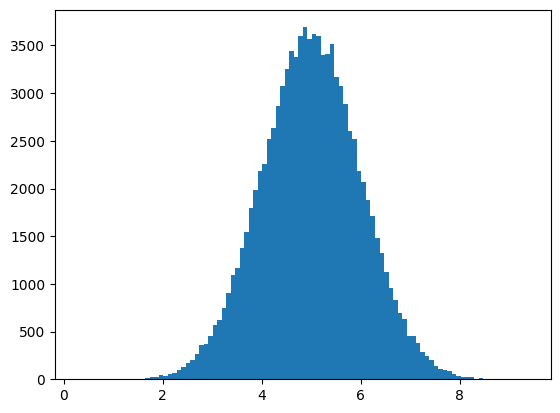

In [4]:
import numpy
import matplotlib.pyplot as plt

x = numpy.random.normal(5.0, 1.0, 100000)

plt.hist(x, 100)
plt.show()

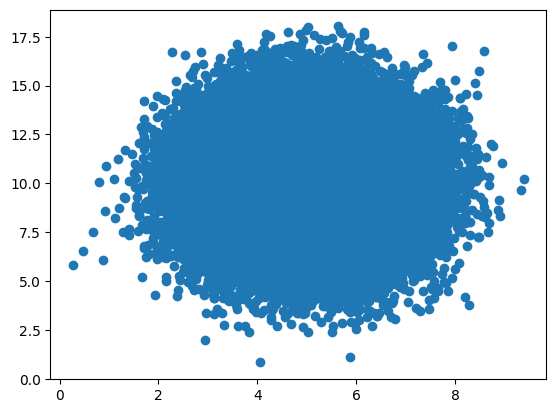

In [5]:
y = numpy.random.normal(10.0, 2.0, 100000)

plt.scatter(x,y)
plt.show()

In [6]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [7]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('您好 Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

您好 Google Drive!

In [9]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'PyDriveSample.txt'})
uploaded.SetContentString('Sample upload file content 範例')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1ZImeHd1l6pdZBnkz10KFBwsa4nOOft6A


In [10]:
# List .txt files in the root.
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, date {}, id {}'.format(file['title'], file['createdDate'], file['id']))

title PyDriveSample.txt, date 2024-11-06T08:20:16.436Z, id 1ZImeHd1l6pdZBnkz10KFBwsa4nOOft6A
title foo.txt, date 2024-11-06T08:05:54.971Z, id 10PNa2R7nnhGHmFwHCHaao81De5E-Yb9k


In [14]:
# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1ZImeHd1l6pdZBnkz10KFBwsa4nOOft6A'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))


Downloaded content "Sample upload file content 範例"


In [15]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)
# 以上code定義此neural network

model.fit(xs, ys, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - loss: 37.8348
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 29.7713
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 23.4272
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 18.4358
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 14.5088
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11.4191
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 8.9882
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.0756
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 5.5708
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 4.3868
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.4551
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 2.7221
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 2.1453
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.6915
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.3343
Epoch 16/100
1/1 ━━━━━━━

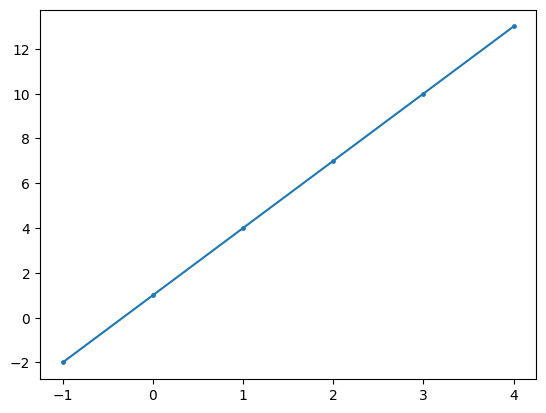

In [16]:
import matplotlib.pyplot as plt
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(xs, ys)

def myfunc(v):
  return slope * v + intercept

mymodel = list(map(myfunc, xs))
plt.scatter(xs,ys,6)
plt.plot(xs, mymodel)
plt.show()

In [19]:
print(model.predict(np.array([10.0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[31.162188]]
